In [ ]:
!pip install fbprophet

In [ ]:
!pip install matplotlip

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 12.2 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=93fa9eb168b4f969f23bffabee2caa4da98450441596e345ba640a19e271a32a
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import matplotlip as plt
import yfinance as yf
from fbprophet import Prophet
import plotly
import pandas as pd

In [ ]:
df = yf.download('BTC-USD',start='2016-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600
...,...,...,...,...,...,...
2021-10-11,54734.125000,57793.039062,54519.765625,57484.789062,57484.789062,42637331698
2021-10-12,57526.832031,57627.878906,54477.972656,56041.058594,56041.058594,41083758949
2021-10-13,56038.257812,57688.660156,54370.972656,57401.097656,57401.097656,41684252783


In [ ]:
df = df.reset_index()

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600
...,...,...,...,...,...,...,...
2106,2021-10-11,54734.125000,57793.039062,54519.765625,57484.789062,57484.789062,42637331698
2107,2021-10-12,57526.832031,57627.878906,54477.972656,56041.058594,56041.058594,41083758949
2108,2021-10-13,56038.257812,57688.660156,54370.972656,57401.097656,57401.097656,41684252783
2109,2021-10-14,57372.832031,58478.734375,56957.074219,57321.523438,57321.523438,36615791366


In [ ]:
df[['ds','y']] = df[['Date','Adj Close']]

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900,2016-01-01,434.334015
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600,2016-01-02,433.437988
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800,2016-01-03,430.010986
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500,2016-01-04,433.091003
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600,2016-01-05,431.959991
...,...,...,...,...,...,...,...,...,...
2106,2021-10-11,54734.125000,57793.039062,54519.765625,57484.789062,57484.789062,42637331698,2021-10-11,57484.789062
2107,2021-10-12,57526.832031,57627.878906,54477.972656,56041.058594,56041.058594,41083758949,2021-10-12,56041.058594
2108,2021-10-13,56038.257812,57688.660156,54370.972656,57401.097656,57401.097656,41684252783,2021-10-13,57401.097656
2109,2021-10-14,57372.832031,58478.734375,56957.074219,57321.523438,57321.523438,36615791366,2021-10-14,57321.523438


In [ ]:
model = Prophet()

In [ ]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(500)

In [ ]:
forecast = model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,-1566.442600,-6061.956063,6045.893953,-1566.442600,-1566.442600,1622.837940,1622.837940,1622.837940,44.539027,44.539027,44.539027,1578.298913,1578.298913,1578.298913,0.0,0.0,0.0,56.395340
1,2016-01-02,-1557.001037,-5818.954774,6306.696081,-1557.001037,-1557.001037,1737.747190,1737.747190,1737.747190,42.793512,42.793512,42.793512,1694.953678,1694.953678,1694.953678,0.0,0.0,0.0,180.746153
2,2016-01-03,-1547.559474,-5893.126634,6198.897298,-1547.559474,-1547.559474,1784.407853,1784.407853,1784.407853,-15.355534,-15.355534,-15.355534,1799.763387,1799.763387,1799.763387,0.0,0.0,0.0,236.848379
3,2016-01-04,-1538.117911,-5878.984267,5887.870716,-1538.117911,-1538.117911,1898.377733,1898.377733,1898.377733,7.111639,7.111639,7.111639,1891.266094,1891.266094,1891.266094,0.0,0.0,0.0,360.259822
4,2016-01-05,-1528.676349,-5353.548320,6265.421941,-1528.676349,-1528.676349,1932.178317,1932.178317,1932.178317,-36.029792,-36.029792,-36.029792,1968.208109,1968.208109,1968.208109,0.0,0.0,0.0,403.501969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606,2023-02-24,104535.821863,95178.603460,120938.757664,93418.236373,116216.289054,3840.302144,3840.302144,3840.302144,44.539027,44.539027,44.539027,3795.763117,3795.763117,3795.763117,0.0,0.0,0.0,108376.124007
2607,2023-02-25,104633.117480,95312.786148,121188.416951,93475.054507,116336.713525,3837.406524,3837.406524,3837.406524,42.793512,42.793512,42.793512,3794.613012,3794.613012,3794.613012,0.0,0.0,0.0,108470.524004
2608,2023-02-26,104730.413097,95569.570011,122036.302430,93531.872640,116457.137996,3764.087704,3764.087704,3764.087704,-15.355534,-15.355534,-15.355534,3779.443238,3779.443238,3779.443238,0.0,0.0,0.0,108494.500801
2609,2023-02-27,104827.708715,95337.909242,121422.990872,93590.033024,116620.446737,3758.711121,3758.711121,3758.711121,7.111639,7.111639,7.111639,3751.599482,3751.599482,3751.599482,0.0,0.0,0.0,108586.419836


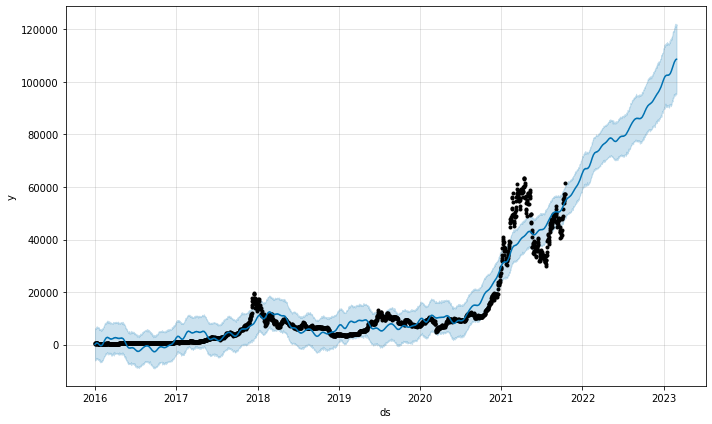

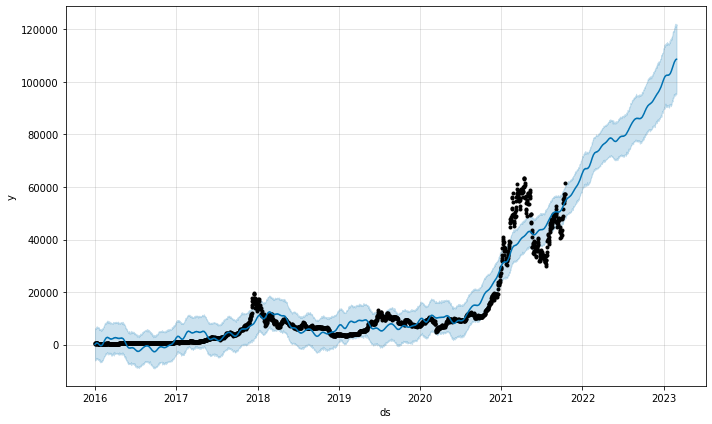

In [ ]:
model.plot(forecast)

In [ ]:
df.to_csv(r'\BTC.csv', index = False)